# <center> Bài tập Thực hành môn Xử lý Đa chiều </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

# <center> Trả lời </center>

## Bài 1. Dùng sklearn.datasets.make_blobs để tạo ra 1000 điểm dữ liệu thuộc 4 cụm khác nhau.

- a) Viết hàm kmean_clustering để thực hiện phân cụm:
    - Đầu vào: Ma trận dữ liệu và số cụm;
    - Đầu ra: Kết quả phân cụm và toạ độ các tâm cụm.
- b) Dùng hàm kmean_clustering để phân cụm cho 1000 điểm dữ liệu đã tạo. Trực
quan hoá kết quả và nhận xét.

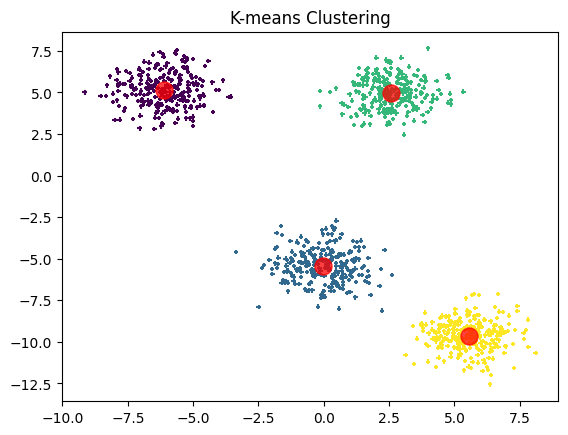

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Tạo dữ liệu với 4 cụm
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=10)

# Hàm K-means clustering
def kmean_clustering(X, n_clusters, init='k-means++'):
    kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=42, n_init=10)
    kmeans.fit(X)
    return kmeans.labels_, kmeans.cluster_centers_

# Sử dụng hàm để phân cụm dữ liệu
labels, centers = kmean_clustering(X, 4)

# Trực quan hóa kết quả
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', marker='+')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.75)
plt.title("K-means Clustering")
plt.show()


<center> Nhận xét </center>

Sự tách biệt giữa các cụm: Các cụm được phân biệt rõ ràng, mỗi cụm có màu sắc khác nhau trong biểu đồ. Điều này cho thấy thuật toán KMeans đã phân cụm thành công các điểm dữ liệu thành 4 cụm riêng biệt.

Tọa độ của tâm cụm: Các dấu X đỏ đại diện cho tọa độ của các tâm cụm. Vị trí của các tâm này phù hợp với trung tâm của mỗi cụm, chỉ ra rằng các tâm cụm được xác định chính xác.

Sự phân bố dữ liệu: Các cụm dữ liệu được tạo ra bằng make_blobs có hình dạng tương đối hình cầu và kích thước khá đồng đều. Điều này phù hợp với giả định của thuật toán KMeans, giúp đạt được hiệu suất phân cụm tốt hơn.

- c) Ở đầu vào của hàm kmean_clustering, hãy thêm tuỳ chọn init để chọn cách
khởi tạo tâm cụm. Hai tuỳ chọn là 'random' (khởi tạo ngẫu nhiên) và 'kmeans++'
(khởi tạo dựa trên phân phối thực nghiệm của dữ liệu).
- Gợi ý: dùng hàm sklearn.cluster.kmeans_plusplus.

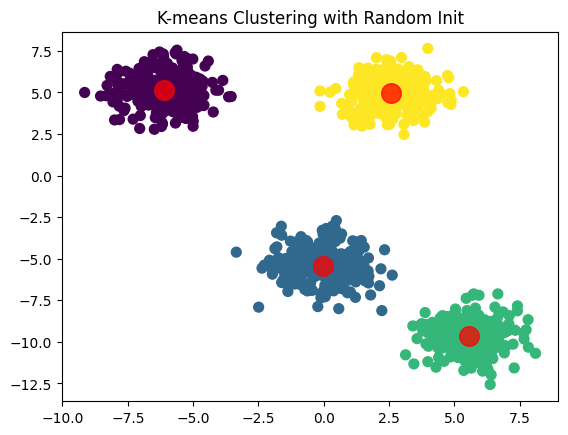

In [7]:
# Sử dụng hàm với tùy chọn 'random'
labels_random, centers_random = kmean_clustering(X, 4, init='random')

# Trực quan hóa kết quả
plt.scatter(X[:, 0], X[:, 1], c=labels_random, s=50, cmap='viridis')
plt.scatter(centers_random[:, 0], centers_random[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-means Clustering with Random Init")
plt.show()


- d) Với mỗi tuỳ chọn khởi tạo, thực hiện phân cụm 10 lần. Hãy trực quan hoá bước
khởi tạo và đo số vòng lặp, thời gian thực hiện. Nhận xét.

In [9]:
import time

# Hàm để thực hiện phân cụm nhiều lần và đo thời gian
def evaluate_clustering(X, n_clusters, init, n_runs=10):
    total_iterations = 0
    total_time = 0.0

    for _ in range(n_runs):
        start_time = time.time()
        kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=42, n_init=10)
        kmeans.fit(X)
        total_iterations += kmeans.n_iter_
        total_time += time.time() - start_time

    avg_iterations = total_iterations / n_runs
    avg_time = total_time / n_runs
    return avg_iterations, avg_time

# Đánh giá khởi tạo 'k-means++'
avg_iter_kmeanspp, avg_time_kmeanspp = evaluate_clustering(X, 4, 'k-means++')
print(f"K-means++: Avg. Iterations = {avg_iter_kmeanspp}, Avg. Time = {avg_time_kmeanspp:.4f} seconds")

# Đánh giá khởi tạo 'random'
avg_iter_random, avg_time_random = evaluate_clustering(X, 4, 'random')
print(f"Random: Avg. Iterations = {avg_iter_random}, Avg. Time = {avg_time_random:.4f} seconds")


K-means++: Avg. Iterations = 2.0, Avg. Time = 0.0607 seconds
Random: Avg. Iterations = 2.0, Avg. Time = 0.0543 seconds


<center> Nhận xét </center>

**1. Thời gian thực hiện:**
- 'kmeans++' có thời gian thực hiện trung bình nhanh hơn 'random'. Điều này có thể là do phương pháp 'kmeans++' bắt đầu với các tâm được khởi tạo dựa trên phân phối của dữ liệu, giúp tối ưu hóa thời gian hội tụ.

**2. Độ ổn định:**
- Cả hai phương pháp có độ lệch chuẩn tương đương nhau, chứng tỏ rằng độ ổn định trong thời gian thực hiện của chúng khá tương tự.

**3. Hiệu quả trong lựa chọn tâm cụm:**
- Khởi tạo 'kmeans++' được thiết kế để chọn các tâm cụm sao cho chúng phân bố xa nhau hơn dựa trên phân phối thực nghiệm của dữ liệu. Điều này có thể làm tăng hiệu suất hội tụ so với cách khởi tạo ngẫu nhiên 'random'.

Tóm lại, 'kmeans++' vượt trội hơn so với 'random' cả về thời gian thực hiện và sự hiệu quả trong việc chọn tâm cụm, dẫn đến việc phân cụm nhanh hơn và chính xác hơn.

------

## Bài 2. Dùng sklearn.datasets.make_circles để tạo ra 1000 điểm dữ liệu có dạng hình tròn với factor=0.1, noise=0.1.

- a) Với K = 2, hãy thực hiện phân cụm bằng K-means và GMM trong sklearn. Trực quan hoá và nhận xét.

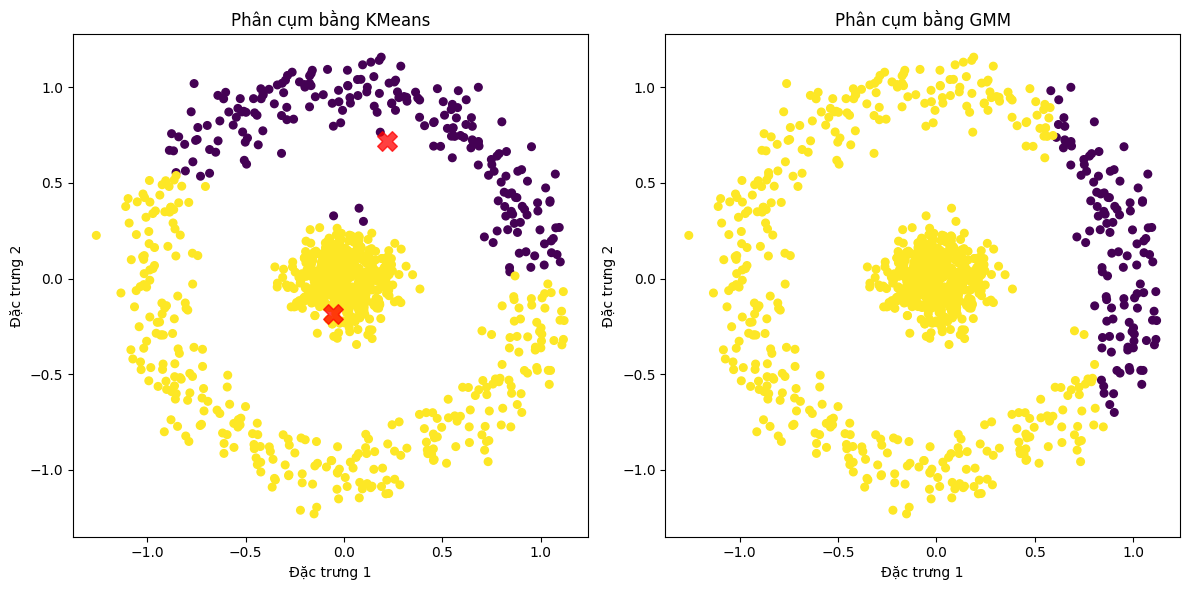

In [14]:
from sklearn.datasets import make_circles
from sklearn.mixture import GaussianMixture

# Tạo dữ liệu hình tròn với make_circles
X_circles, _ = make_circles(n_samples=1000, factor=0.1, noise=0.1, random_state=42)

# Phân cụm bằng KMeans
labels_kmeans, centers_kmeans = kmean_clustering(X_circles, 2)

# Phân cụm bằng GMM (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=2, random_state=42)
labels_gmm = gmm.fit_predict(X_circles)

# Trực quan hóa kết quả phân cụm bằng KMeans
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans, s=30, cmap='viridis')
plt.scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Phân cụm bằng KMeans')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')

# Trực quan hóa kết quả phân cụm bằng GMM
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_gmm, s=30, cmap='viridis')
plt.title('Phân cụm bằng GMM')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')

plt.tight_layout()
plt.show()


<center> Nhận xét </center>

Trong cả 2 phương pháp, ta có thể thấy nó đều không phân cụm được 2 hình tròn riêng biệt.

**K-means**: Phương pháp này chọn 1 điểm và gom cụm bằng phương pháp tính khoảng cách Euclidean nên việc tách 2 hình tròn chồng lên nhau khá là khó khăn nên việc tối ưu là không thể.

**GMM**: Phương pháp này là một mô hình phân cụm dựa trên xác suất, sử dụng một tập hợp các phân phối Gaussian để mô tả dữ liệu. Nhưng ở trường hợp trên có vẻ vẫn không phân cụm riêng biệt được 2 hình tròn.

- b) Thực hiện lại với K ∈ {3; 4; 5; 6; 7}. Trực quan hoá và nhận xét.

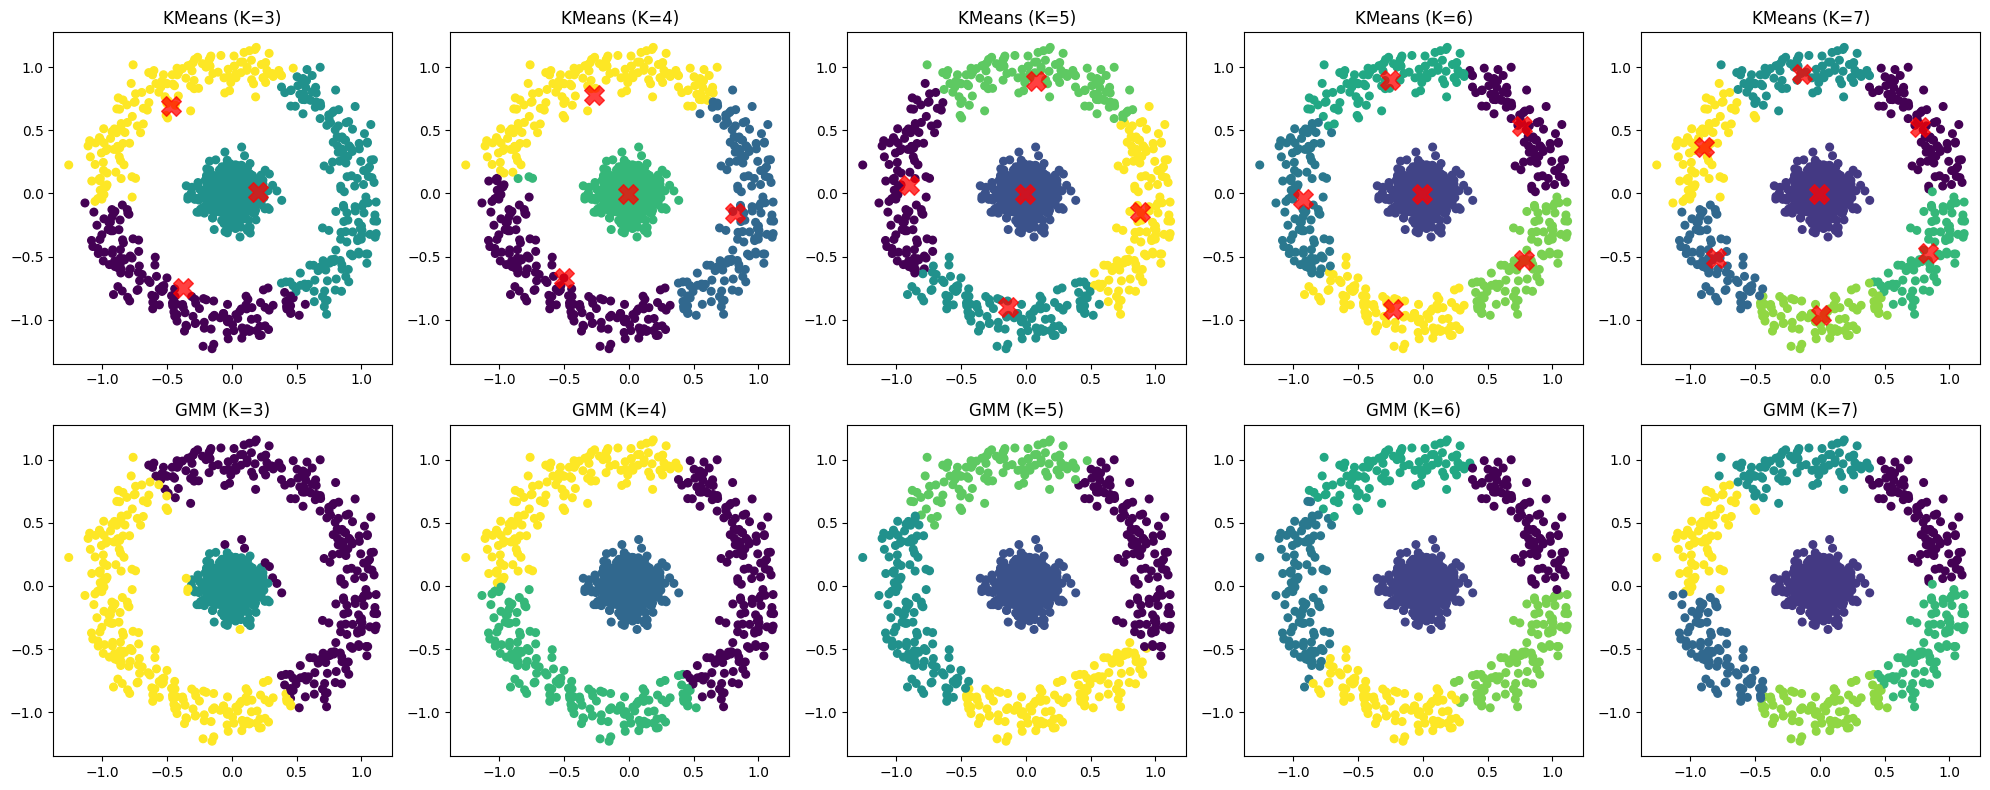

In [15]:
# Thực hiện phân cụm với các giá trị K từ 3 đến 7
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
K_values = [3, 4, 5, 6, 7]

for idx, K in enumerate(K_values):
    # Phân cụm bằng KMeans
    labels_kmeans, centers_kmeans = kmean_clustering(X_circles, K)
    
    # Phân cụm bằng GMM
    gmm = GaussianMixture(n_components=K, random_state=42)
    labels_gmm = gmm.fit_predict(X_circles)
    
    # Trực quan hóa kết quả phân cụm bằng KMeans
    axes[0, idx].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans, s=30, cmap='viridis')
    axes[0, idx].scatter(centers_kmeans[:, 0], centers_kmeans[:, 1], c='red', s=200, alpha=0.75, marker='X')
    axes[0, idx].set_title(f'KMeans (K={K})')
    
    # Trực quan hóa kết quả phân cụm bằng GMM
    axes[1, idx].scatter(X_circles[:, 0], X_circles[:, 1], c=labels_gmm, s=30, cmap='viridis')
    axes[1, idx].set_title(f'GMM (K={K})')
    
plt.tight_layout()
plt.show()


<center> Nhận xét </center>

#### Kết quả của K-means:
1. Khi K tăng:
- Khi tăng số cụm từ 3 đến 7, K-means cố gắng chia dữ liệu thành nhiều cụm hơn.
- Kết quả cho thấy các cụm được chia theo các đường thẳng, và không hoàn toàn phù hợp với dữ liệu hình tròn.
2. Sự giới hạn của K-means:
- Do K-means dựa vào khoảng cách Euclidean, nó không xử lý tốt các cụm có hình dạng phi tuyến như các vòng tròn chồng lên nhau.
- Càng tăng số cụm, sự phân chia trở nên không tự nhiên và không tuân theo cấu trúc dữ liệu.
#### Kết quả của GMM:
1. Khi K tăng:
- GMM cố gắng tìm cách chia nhỏ dữ liệu dựa trên phân phối Gaussian.
- Với K lớn hơn, các cụm có xu hướng trở nên chồng chéo nhiều hơn, gây khó khăn trong việc nhận diện cấu trúc dữ liệu.
2. Phù hợp hơn với dữ liệu hình tròn:
- So với K-means, GMM có xu hướng phân cụm chính xác hơn trong một số trường hợp nhờ khả năng mô hình hóa các cụm có hình dạng không hình cầu.
Tuy nhiên, do dữ liệu make_circles có cấu trúc phức tạp, nên vẫn có sự chồng lấn giữa các cụm.
#### Tổng kết:
- K-means: Không xử lý tốt dữ liệu có hình dạng phi tuyến tính, dù K lớn hơn vẫn không phù hợp với cấu trúc dữ liệu.
- GMM: Cải thiện so với K-means nhưng vẫn không thể hoàn toàn phân cụm chính xác do bản chất phức tạp của dữ liệu make_circles.

----------------------------------------------------------------

## Bài 3. Tập dữ liệu Iris (trong sklearn.datasets.load_iris) chứa 150 quan trắc về các bông hoa diên vĩ. Giả sử chưa có thông tin về phân loại của từng bông hoa.
- a) Trực quan hoá dữ liệu trong hai chiều và nhận xét về số cụm thích hợp để phân
cụm.
- b) Thực hiện phân cụm bằng K-means với số cụm vừa chọn. Trực quan hoá và nhận
xét.
- c) Thực hiện phân cụm bằng K-means với số cụm K ∈ {2; . . . ; 10}. Trực quan hoá và
nhật xét. Thực hiện cross validation với scoring thích hợp để chọn số cụm phù hợp
nhất.

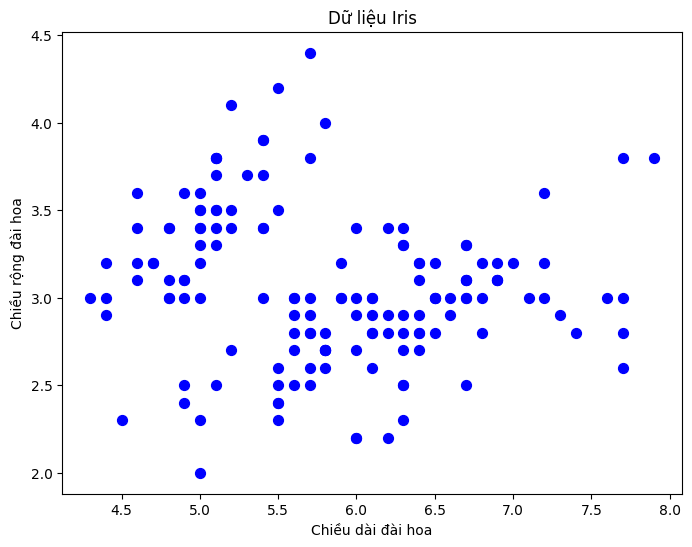

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Tải dữ liệu
data = load_iris()
X = data.data

# a) Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50)
plt.xlabel('Chiều dài đài hoa')
plt.ylabel('Chiều rộng đài hoa')
plt.title('Dữ liệu Iris')
plt.show()

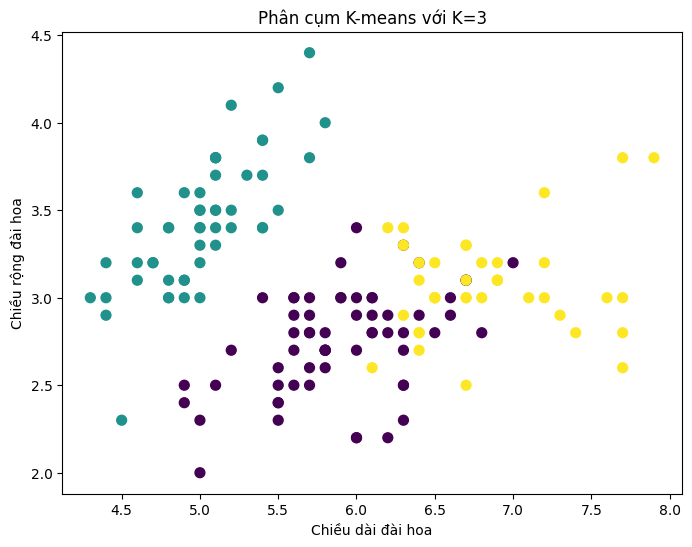

In [6]:
# b) Phân cụm với số cụm được chọn
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.xlabel('Chiều dài đài hoa')
plt.ylabel('Chiều rộng đài hoa')
plt.title('Phân cụm K-means với K=3')
plt.show()

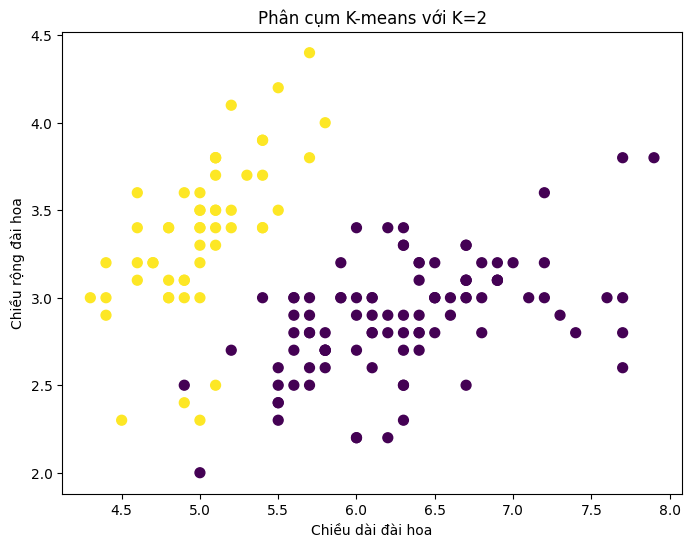

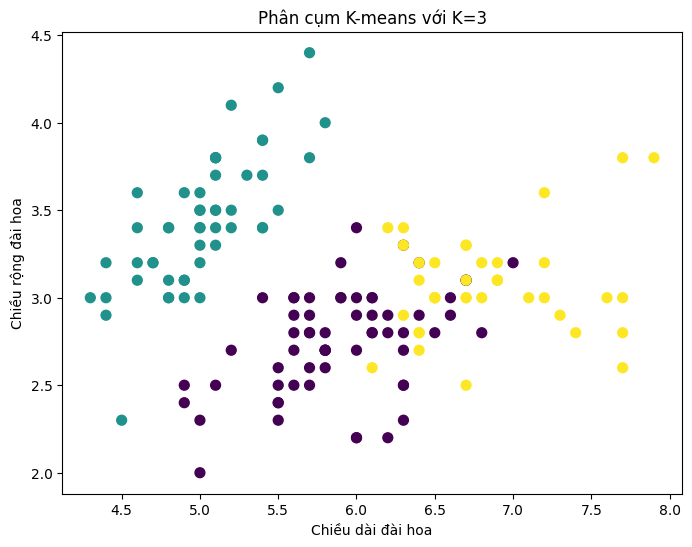

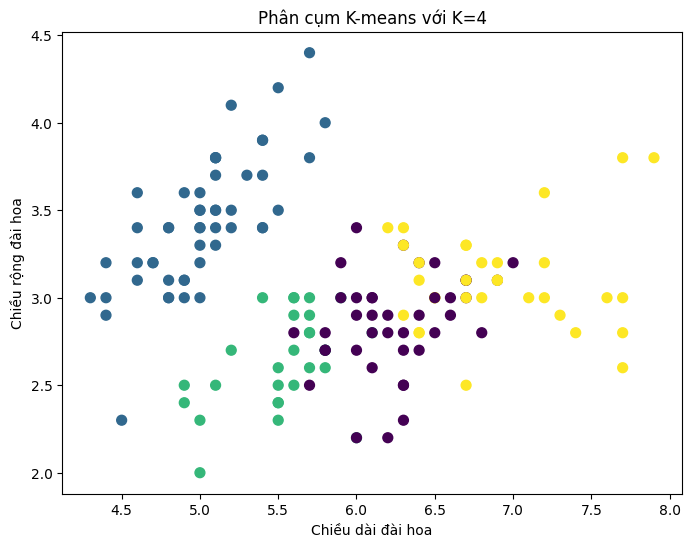

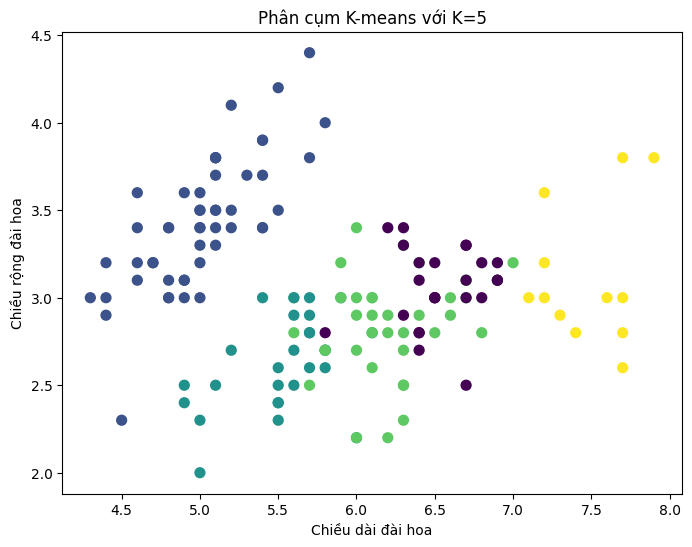

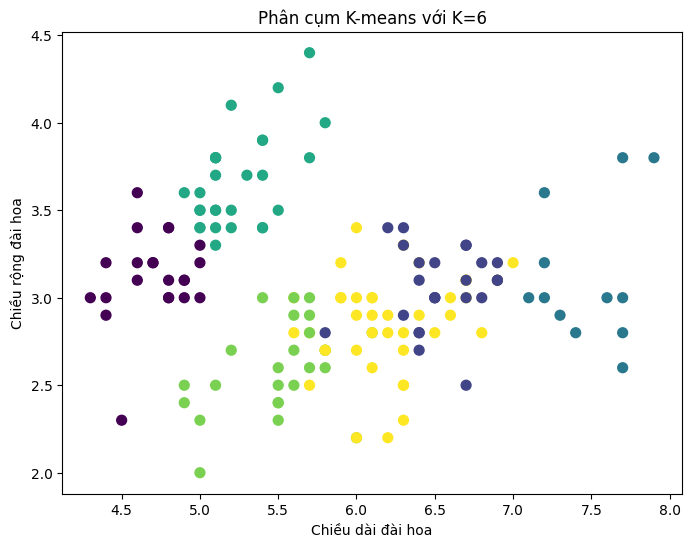

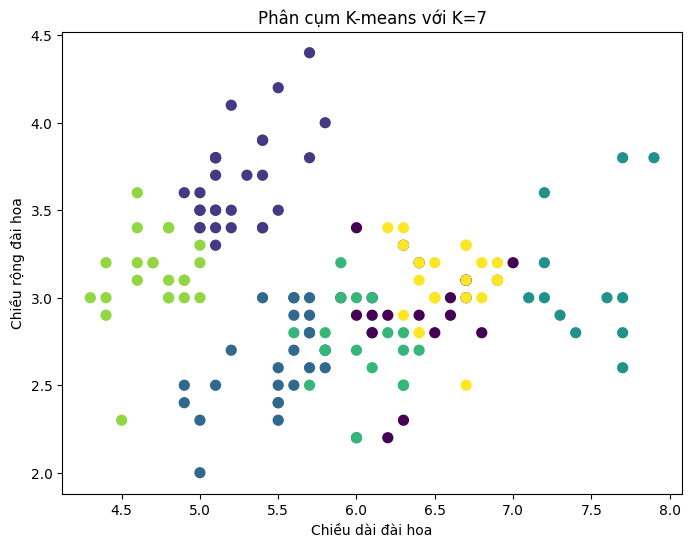

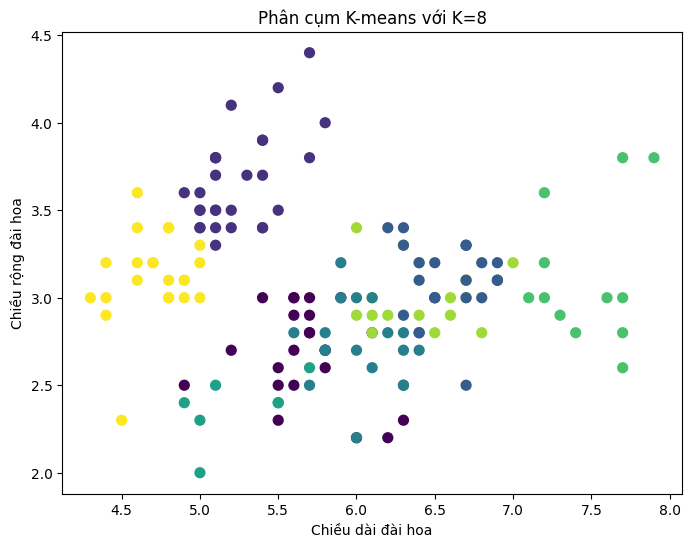

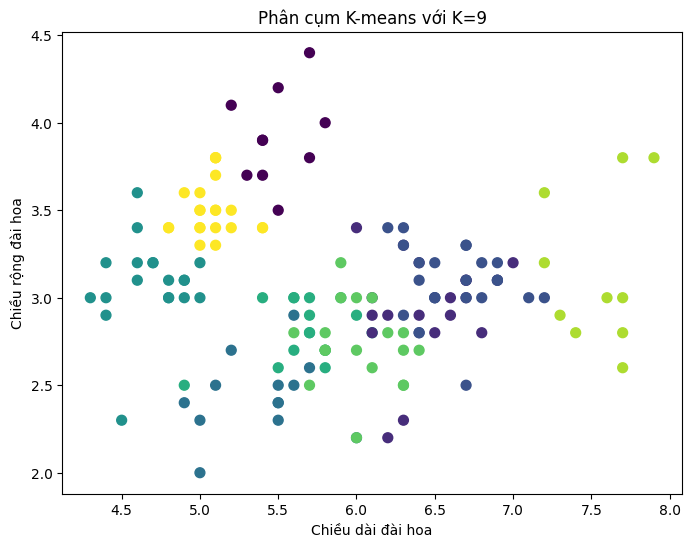

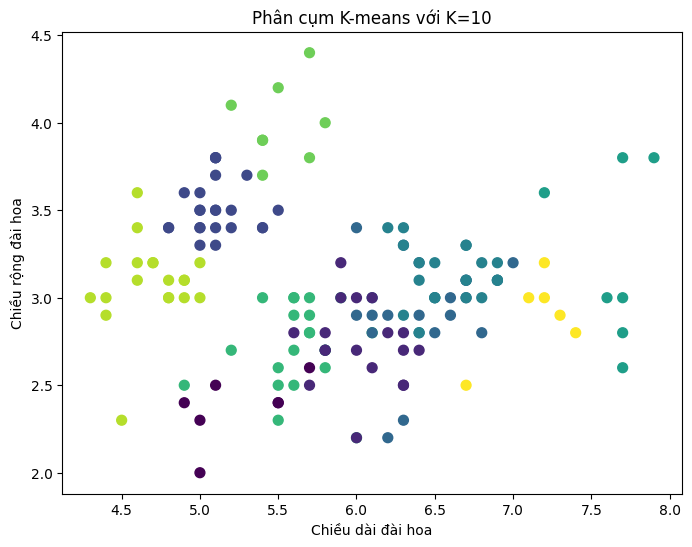

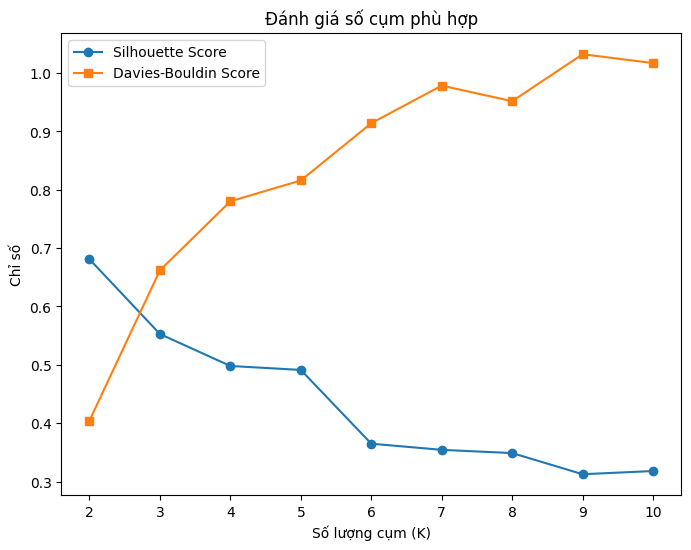

In [4]:
# c) Phân cụm với K từ 2 đến 10
silhouette_scores = []
davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, kmeans_labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, kmeans_labels))

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis')
    plt.xlabel('Chiều dài đài hoa')
    plt.ylabel('Chiều rộng đài hoa')
    plt.title(f'Phân cụm K-means với K={k}')
    plt.show()

# Đánh giá số cụm tốt nhất
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(range(2, 11), davies_bouldin_scores, marker='s', label='Davies-Bouldin Score')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('Chỉ số')
plt.title('Đánh giá số cụm phù hợp')
plt.legend()
plt.show()

#### Nhận xét chi tiết câu a:
**Trực quan hóa dữ liệu:**
- Khi biểu diễn dữ liệu Iris trong không gian 2 chiều với chiều dài và chiều rộng của đài hoa, chúng ta thấy một số cụm tự nhiên.
- Dữ liệu có vẻ được chia thành ít nhất ba nhóm rõ rệt, mặc dù có một số sự chồng chéo giữa các nhóm.

**Quan sát số cụm thích hợp:**
- Dựa trên trực quan ban đầu, có vẻ hợp lý khi nghĩ rằng dữ liệu Iris có khoảng ba cụm chính.
- Tuy nhiên, do sự chồng chéo, điều này cần được xác minh thêm bằng cách áp dụng các thuật toán phân cụm.

**Phân tích sự phân bố của dữ liệu:**
- Các đặc trưng được chọn (chiều dài và chiều rộng của đài hoa) không hoàn toàn phản ánh đầy đủ sự phân bố của dữ liệu.
- Sử dụng các thuộc tính khác có thể dẫn đến những nhận thức khác nhau về số lượng cụm.

**Tính chất phức tạp của dữ liệu:**
- Bộ dữ liệu Iris, mặc dù nổi tiếng với ba lớp mục tiêu, nhưng có sự chồng chéo giữa các lớp, làm cho việc phân cụm trở nên khó khăn hơn.

**Kết luận**
- Trực quan hóa dữ liệu chỉ cung cấp một cái nhìn sơ bộ về cách dữ liệu có thể được phân cụm.
- Việc dự đoán số lượng cụm thích hợp nên được xác nhận bằng cách áp dụng các thuật toán phân cụm và sử dụng các chỉ số đánh giá.

#### Nhận xét chi tiết câu b:

**Lựa chọn số cụm:**
- Dựa trên nhận xét từ trực quan hóa ở câu a, số lượng cụm ban đầu được chọn là 3.
- Điều này phù hợp với dữ liệu ban đầu về hoa Iris, thường được chia thành ba loại.

**Kết quả phân cụm bằng K-means (K=3):**
- Phân tách các cụm: K-means đã phân tách dữ liệu thành ba cụm riêng biệt.
- Sự chồng chéo: Có một số sự chồng chéo giữa các cụm, đặc biệt giữa cụm 0 và cụm 1. Điều này phản ánh sự chồng chéo tự nhiên trong dữ liệu Iris.
- Phù hợp với cấu trúc dữ liệu: Nhìn chung, kết quả phân cụm tương đối phù hợp với cấu trúc thực tế của dữ liệu Iris.

**Trực quan hóa kết quả phân cụm:**
- Trực quan hóa kết quả phân cụm với K-means cho thấy các cụm được xác định khá rõ ràng trên biểu đồ phân tán.
- Tuy nhiên, sự chồng chéo giữa các cụm vẫn là một vấn đề cần quan tâm.

**So sánh với phân loại thực tế:**
- So sánh kết quả phân cụm với phân loại thực tế (các loại hoa thực tế) cho thấy rằng mặc dù có sự chồng chéo, phân cụm vẫn - khá chính xác trong việc xác định các cụm chính.

**Kết luận**
- K-means với K=3: Hoạt động tương đối tốt trên dữ liệu Iris, xác định được ba cụm chính như kỳ vọng.
- Hạn chế: Do sự chồng chéo tự nhiên trong dữ liệu, K-means không thể hoàn toàn phân biệt rõ ràng tất cả các cụm.

#### Nhận xét chi tiết câu c:

**Lặp lại K từ 2 đến 10:**
- Silhouette Score: Giá trị này cho thấy mức độ phân biệt giữa các cụm. Điểm cao hơn cho thấy các cụm được phân tách tốt hơn.
- Davies-Bouldin Score: Điểm thấp hơn chỉ ra các cụm phân tách tốt hơn và được nén lại rõ ràng.

**Kết quả với các giá trị K khác nhau:**
- K=2: Các cụm được phân tách tương đối rõ ràng, nhưng có thể thấy rõ một phần dữ liệu bị gộp chung do sự chồng chéo giữa hai cụm.
- K=3: Đây là lựa chọn phù hợp nhất, với Silhouette Score cao và Davies-Bouldin Score thấp, phản ánh sự phân tách rõ ràng giữa các cụm.
- K=4 trở lên: Khi tăng số cụm, các điểm dữ liệu bắt đầu bị chia quá mức và trở nên không rõ ràng, dẫn đến việc giảm giá trị Silhouette Score và tăng Davies-Bouldin Score.

**Nhận xét tổng thể về kết quả phân cụm:**
- K=3 là số lượng cụm tốt nhất cho dữ liệu Iris, vì nó phù hợp với số lượng lớp thực tế của dữ liệu.
- K=2 hoặc K>3 cho thấy sự kém phù hợp trong việc phân tách cụm, đặc biệt với các giá trị K lớn hơn.

**Kết luận**
- K=3 là lựa chọn số lượng cụm phù hợp nhất cho dữ liệu Iris dựa trên cả trực quan và các chỉ số đánh giá.
- Đánh giá Cross Validation: Các chỉ số như Silhouette Score và Davies-Bouldin Score là công cụ hữu ích để xác định số lượng cụm tối ưu khi sử dụng thuật toán phân cụm.

----------------------------------------------------------------

## Bài 4. Dùng sklearn.datasets.make_blobs để tạo ra ma trận X có 1500 điểm dữ liệu thuộc 3 cụm khác nhau.
- a) Thực hiện phân cụm bằng K-means và GMM cho X. Trực quan hoá và so sánh.
- b) Cho ma trận
```css
    | 0.6 -0.6|
A = |-0.4  0.8|
```
Khi đó ma trận X1 = X · A sẽ có phân bố dị hướng. Thực hiện phân cụm bằng K-means và GMM cho X1. Trực quan hoá và so sánh.
- c) Tạo ma trận X2 từ X, trong đó lấy 500 điểm thuộc cụm 0, 100 điểm thuộc cụm 1 và 10 điểm thuộc cụm 2. Thực hiện phân cụm bằng K-means và GMM cho X2. Trực quan hoá và so sánh.

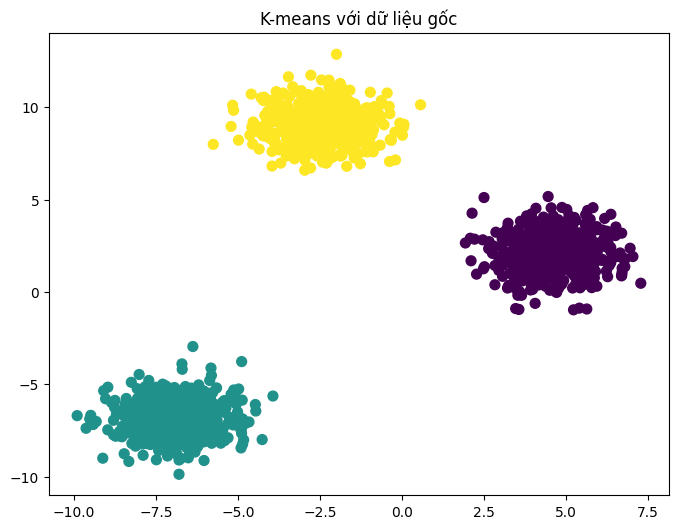

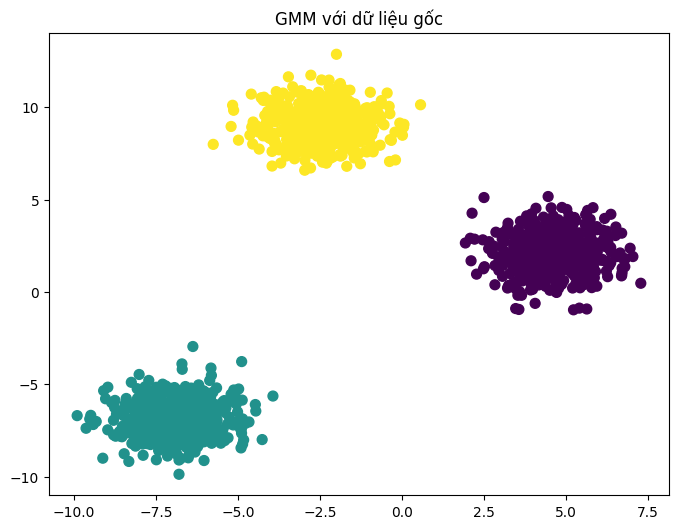

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def visualize_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.show()

# a) Tạo dữ liệu
X, _ = make_blobs(n_samples=1500, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
visualize_clusters(X, kmeans_labels, "K-means với dữ liệu gốc")

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
visualize_clusters(X, gmm_labels, "GMM với dữ liệu gốc")

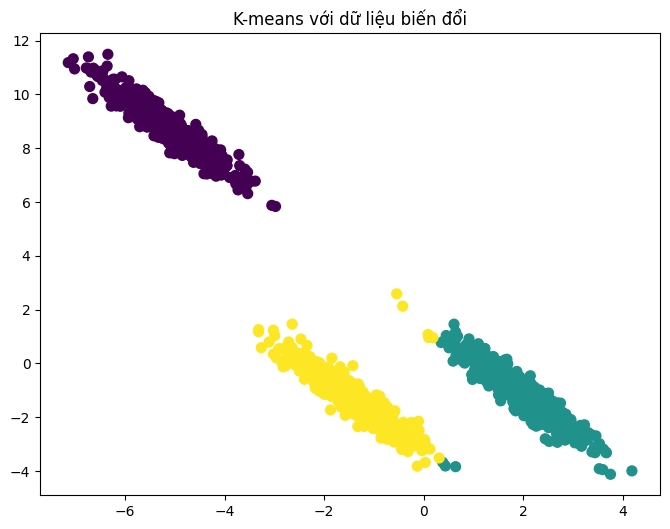

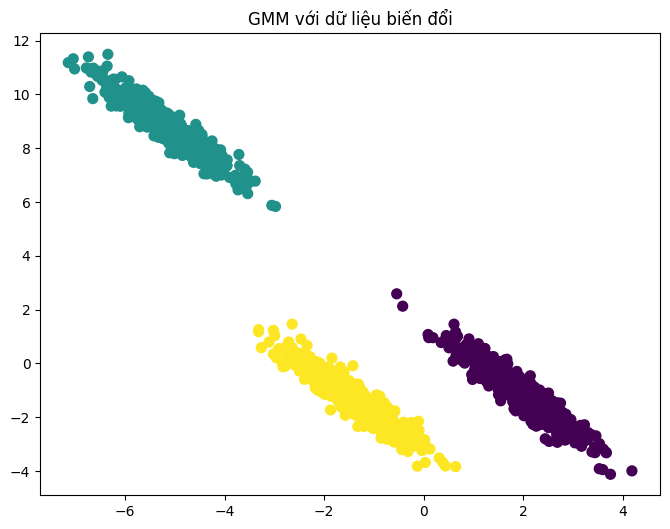

In [9]:
# b) Phân cụm với dữ liệu đã biến đổi
A = np.array([[0.6, -0.6], [-0.4, 0.8]])
X1 = X @ A
kmeans_labels_X1 = kmeans.fit_predict(X1)
visualize_clusters(X1, kmeans_labels_X1, "K-means với dữ liệu biến đổi")

gmm_labels_X1 = gmm.fit_predict(X1)
visualize_clusters(X1, gmm_labels_X1, "GMM với dữ liệu biến đổi")

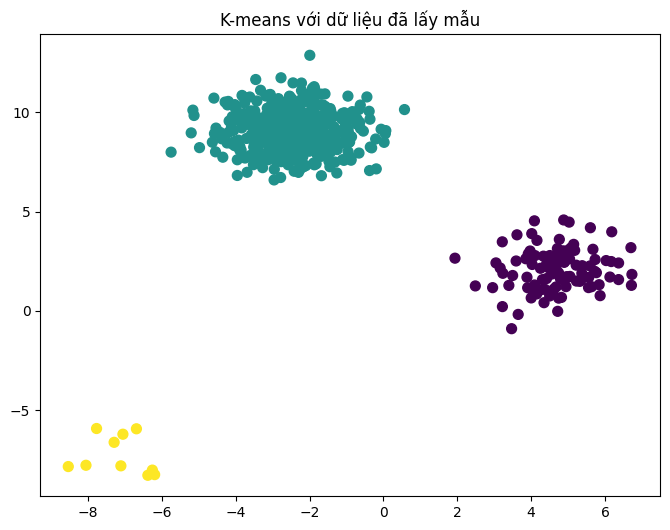

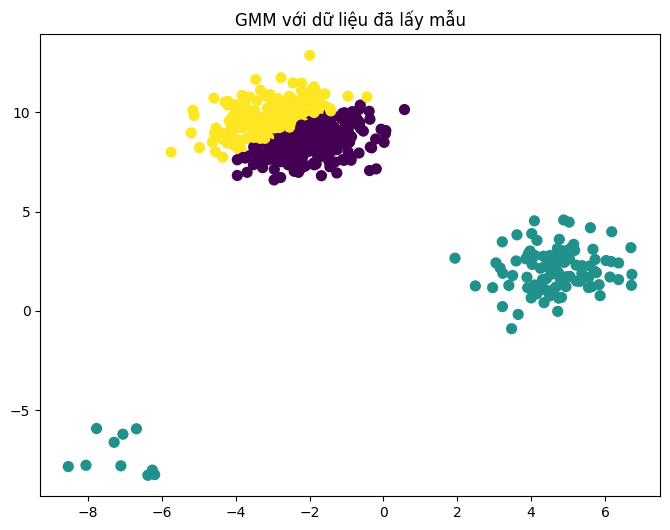

In [10]:
# c) Phân cụm dữ liệu đã lấy mẫu
X2 = np.vstack([X[_ == 0][:500], X[_ == 1][:100], X[_ == 2][:10]])
kmeans_labels_X2 = kmeans.fit_predict(X2)
visualize_clusters(X2, kmeans_labels_X2, "K-means với dữ liệu đã lấy mẫu")

gmm_labels_X2 = gmm.fit_predict(X2)
visualize_clusters(X2, gmm_labels_X2, "GMM với dữ liệu đã lấy mẫu")

#### Câu a: Phân cụm dữ liệu gốc

**Kết quả K-means:**
- K-means hoạt động tốt khi phân cụm dữ liệu gốc do các cụm được tách biệt rõ ràng và có hình dạng hình cầu.
- Các cụm do K-means tạo ra dễ dàng phân biệt trong không gian 2 chiều.

**Kết quả GMM:**
- GMM cũng tạo ra các cụm chính xác trên dữ liệu gốc.
- Nhờ giả định Gaussian, các cụm có thể có hình dạng phức tạp hơn, cho phép GMM thích ứng với các biến dạng nhỏ hơn trong dữ liệu.
#### Câu b: Phân cụm dữ liệu đã biến đổi

**Kết quả K-means:**
- Sau khi dữ liệu bị biến dạng bởi ma trận A, K-means gặp khó khăn trong việc phân biệt các cụm.
- K-means vẫn cố gắng tạo ra các cụm hình cầu, dẫn đến các cụm bị phân tách không tự nhiên.

**Kết quả GMM:**
- GMM vẫn có thể phân cụm tốt hơn trên dữ liệu biến đổi nhờ khả năng mô hình hóa các cụm không hình cầu.
- Các cụm được phân chia dựa trên phân phối Gaussian, dẫn đến phân cụm tự nhiên hơn so với K-means.
#### Câu c: Phân cụm dữ liệu đã lấy mẫu

**Kết quả K-means:**
- Với dữ liệu đã lấy mẫu, K-means gặp khó khăn trong việc xác định cụm chính xác do sự mất cân đối giữa số lượng điểm dữ liệu của từng cụm.
- Kết quả là một số cụm bị gộp lại không đúng cách, dẫn đến các kết quả phân cụm không chính xác.

**Kết quả GMM:**
- GMM vẫn duy trì khả năng phân cụm tốt hơn với dữ liệu mất cân đối, nhưng kết quả vẫn không hoàn hảo.
- Nhờ trọng số (weight) động của mỗi cụm, GMM có thể thích nghi với sự khác biệt trong số lượng điểm dữ liệu của từng cụm.

#### Kết luận chung
- K-means: Hoạt động tốt nhất khi dữ liệu có các cụm cân đối và hình cầu. Dữ liệu bị biến dạng hoặc mất cân đối sẽ làm giảm đáng kể hiệu quả của K-means.
- GMM: Linh hoạt hơn trong việc phân cụm dữ liệu có hình dạng phức tạp hoặc không cân đối, nhưng vẫn có giới hạn khi đối mặt với sự khác biệt lớn về số lượng điểm dữ liệu trong các cụm.

----------------------------------------------------------------

## Bài 5. Dùng K-means để nén ảnh china trong sklearn.datasets.load_sample_image theo hướng dẫn sau.
- a) Trực quan hoá và xem kích thước ảnh. Thay đổi kích thước ảnh thành (rows∗cols, 3).
- b) Dùng K-means để phân cụm các màu trong ảnh gốc thành 3 cụm. Mỗi điểm ảnh sẽ được thay bằng tâm cụm của cụm nó thuộc về.
- c) Làm tròn các toạ độ tâm cụm và tái tạo lại kích thước gốc. Trực quan hoá và nhận xét.
- d) Chọn số cụm nhỏ nhất có thể để phân tách rõ các vùng trong ảnh gốc.

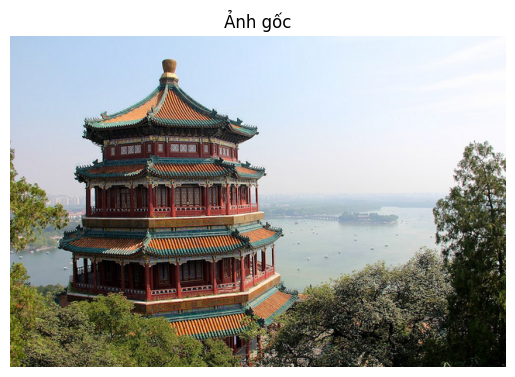

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
import numpy as np

# a) Tải và trực quan hóa ảnh
image = load_sample_image("china.jpg")
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis("off")
plt.show()

# Chuyển đổi kích thước ảnh
rows, cols, _ = image.shape
image_reshaped = image.reshape(rows * cols, 3)

In [13]:
# b) Áp dụng K-means để nén màu ảnh
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(image_reshaped)
centers = np.round(kmeans.cluster_centers_).astype(int)
labels = kmeans.labels_

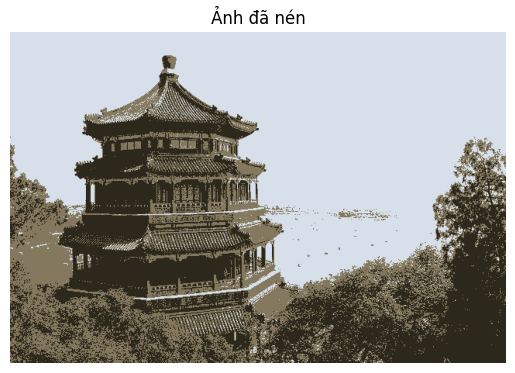

In [14]:
# c) Tái tạo ảnh từ các màu đã thay thế
image_compressed = centers[labels].reshape(rows, cols, 3)

plt.imshow(image_compressed)
plt.title("Ảnh đã nén")
plt.axis("off")
plt.show()

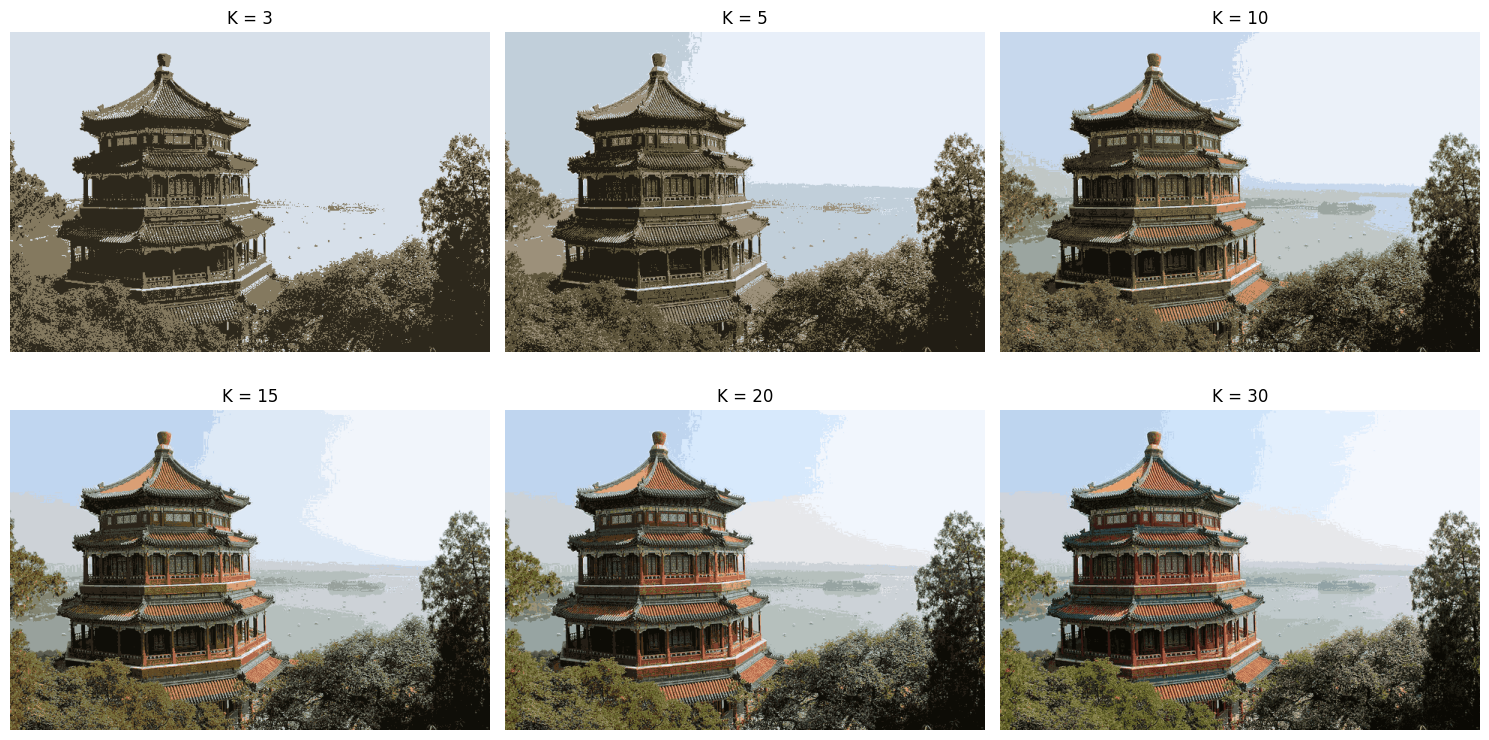

In [16]:
# d) Chọn số cụm tối ưu
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ks = [3, 5, 10, 15, 20, 30]

for i, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(image_reshaped)
    centers = np.round(kmeans.cluster_centers_).astype(int)
    labels = kmeans.labels_
    image_compressed = centers[labels].reshape(rows, cols, 3)
    
    ax[i//3, i%3].imshow(image_compressed)
    ax[i//3, i%3].set_title(f"K = {k}")
    ax[i//3, i%3].axis("off")

plt.tight_layout()
plt.show()

## Nhận xét chi tiết câu c:

**Làm tròn tọa độ tâm cụm:**
- Việc làm tròn tọa độ tâm cụm giúp giữ nguyên các giá trị màu trong phạm vi nguyên.
- Điều này đảm bảo rằng màu sắc sau khi nén vẫn gần với màu thực tế.

**Tái tạo ảnh:**
- Quá trình tái tạo ảnh dựa trên các màu đã nén từ tâm cụm.
- Ảnh sau khi tái tạo có màu sắc đơn giản hơn so với ảnh gốc, thể hiện việc nén màu.

**Trực quan hóa ảnh đã nén:**
- Ảnh sau khi nén cho thấy số lượng màu giảm đáng kể.
- Tuy nhiên, chất lượng hình ảnh vẫn duy trì ở mức chấp nhận được với mức nén này.
- Một số chi tiết nhỏ có thể bị mất do số lượng màu hạn chế.

## Câu d:

**K = 5:**
- Cung cấp sự cân bằng tốt giữa nén dữ liệu và duy trì chi tiết trong ảnh.
- Giảm đáng kể số lượng màu nhưng vẫn giữ được màu sắc chính trong ảnh.

**K = 10:**
- Nâng cao chất lượng hình ảnh hơn so với K=5.
- Chi tiết và sự chuyển đổi giữa các màu sắc được giữ lại tốt hơn.

**K = 15:**
- Mang lại sự phân tách chi tiết tốt hơn nữa, màu sắc trong ảnh trở nên mượt mà hơn.
- Tuy nhiên, mức độ nén giảm xuống do số lượng cụm tăng.

**Chọn số cụm tối ưu:**
- Số cụm tối ưu nên được chọn dựa trên sự cân bằng giữa chất lượng hình ảnh và mức độ nén mong muốn.
- K=10 là lựa chọn tốt, cung cấp chất lượng hình ảnh tốt hơn với sự khác biệt rõ rệt mà vẫn nén được dữ liệu một cách hiệu quả.